Processing Hyderabad, India...

--- Extracted Data ---
Highways: 11
Bus Stops: 455
Metro Lines: 4
Airports: 3


/var/folders/nx/g170gv_x4h52q5q94lvh6mxw0000gp/T/ipykernel_1014/3484537403.py:85: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


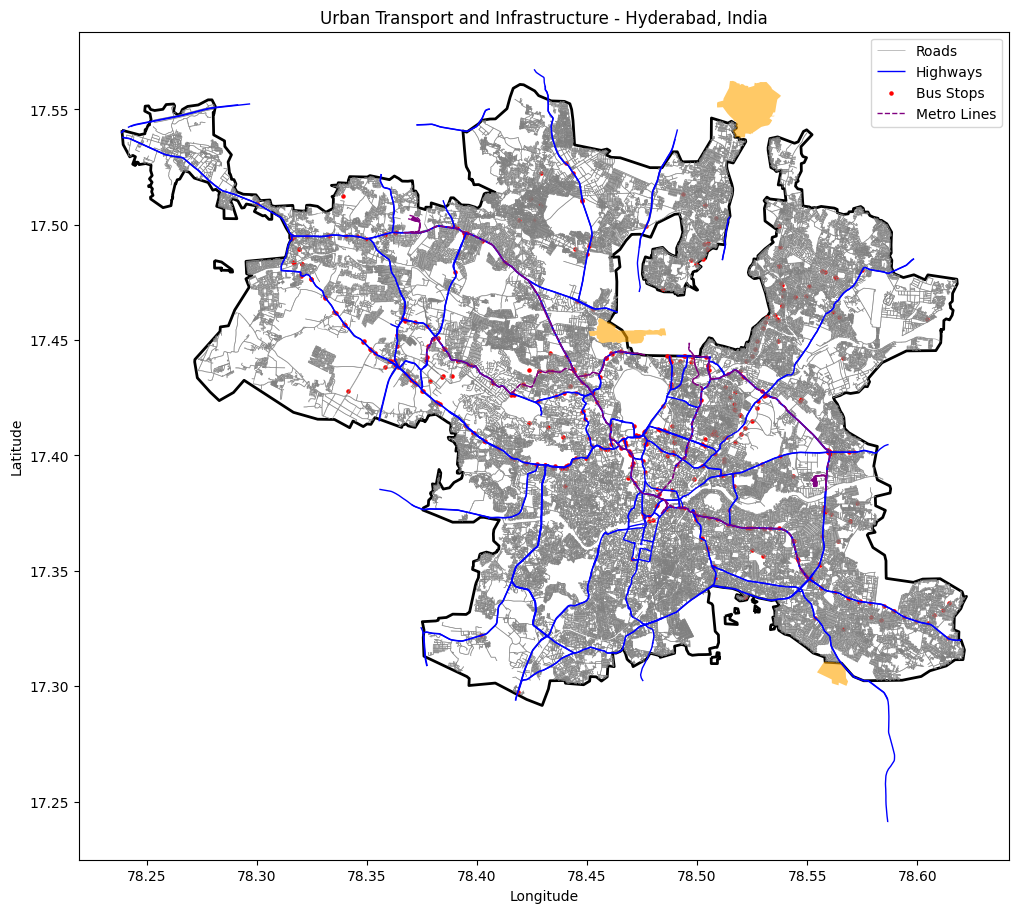

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def analyze_single_city(city_name):
    try:
        print(f"Processing {city_name}...")

        city_boundary = ox.geocode_to_gdf(city_name)
        if city_boundary is None or city_boundary.empty:
            print(f"Error: Could not find boundary for {city_name}")
            return

        try:
            roads = ox.graph_from_polygon(city_boundary.geometry.iloc[0], network_type="drive")
            roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
        except Exception as e:
            print(f"Error extracting roads for {city_name}: {e}")
            roads_gdf = gpd.GeoDataFrame()

        try:
            highways = ox.features_from_polygon(city_boundary.geometry.iloc[0], 
                                                tags={"highway": ["motorway", "trunk", "primary"]})
            num_unique_highways = (highways["ref"].dropna().str.split(';', expand=True).stack().nunique() 
                                   if "ref" in highways.columns and not highways["ref"].isna().all() 
                                   else 0)
        except Exception as e:
            print(f"Error extracting highways for {city_name}: {e}")
            num_unique_highways = 0
            highways = gpd.GeoDataFrame()

        try:
            bus_stops = ox.features_from_polygon(city_boundary.geometry.iloc[0], tags={"highway": "bus_stop"})
            num_bus_stops = len(bus_stops) if bus_stops is not None and not bus_stops.empty else 0
        except Exception as e:
            print(f"Error extracting bus stops for {city_name}: {e}")
            num_bus_stops = 0
            bus_stops = gpd.GeoDataFrame()

        try:
            metro_lanes = ox.features_from_polygon(city_boundary.geometry.iloc[0], 
                                                   tags={"railway": ["subway", "light_rail", "tram"]})
            num_metro_lanes = metro_lanes['name'].nunique() if 'name' in metro_lanes.columns else 0
        except Exception as e:
            print(f"Error extracting metro lanes for {city_name}: {e}")
            num_metro_lanes = 0
            metro_lanes = gpd.GeoDataFrame()

        try:
            airports = ox.features_from_polygon(city_boundary.geometry.iloc[0], tags={"aeroway": "aerodrome"})
            num_airports = len(airports) if airports is not None and not airports.empty else 0
        except Exception as e:
            print(f"Error extracting airports for {city_name}: {e}")
            num_airports = 0
            airports = gpd.GeoDataFrame()

        print("\n--- Extracted Data ---")
        print(f"Highways: {num_unique_highways}")
        print(f"Bus Stops: {num_bus_stops}")
        print(f"Metro Lines: {num_metro_lanes}")
        print(f"Airports: {num_airports}")

        fig, ax = plt.subplots(figsize=(12, 12))

        city_boundary.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2, label="City Boundary")
        if not roads_gdf.empty:
            roads_gdf.plot(ax=ax, color="gray", linewidth=0.5, alpha=0.7, label="Roads")
        if not highways.empty:
            highways.plot(ax=ax, color="blue", linewidth=1, label="Highways")
        if not bus_stops.empty:
            bus_stops.plot(ax=ax, color="red", markersize=5, label="Bus Stops")
        if not metro_lanes.empty:
            metro_lanes.plot(ax=ax, color="purple", linewidth=1, linestyle="--", label="Metro Lines")
        if not airports.empty:
            airports.plot(ax=ax, color="orange", markersize=100, alpha=0.6, label="Airports")

        plt.legend()
        plt.title(f"Urban Transport and Infrastructure - {city_name}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

    except Exception as e:
        print(f"Error processing {city_name}: {e}")


city_name = "Hyderabad, India"  
analyze_single_city(city_name)


Processing Amaravati, India...
Error extracting metro lanes for Amaravati, India: No matching features. Check query location, tags, and log.
Processing Dispur, India...
Error extracting metro lanes for Dispur, India: No matching features. Check query location, tags, and log.
Error extracting airports for Dispur, India: No matching features. Check query location, tags, and log.
Processing Patna, India...
Error extracting metro lanes for Patna, India: No matching features. Check query location, tags, and log.
Processing Raipur, India...
Error extracting metro lanes for Raipur, India: No matching features. Check query location, tags, and log.
Processing Gandhinagar, India...
Error extracting airports for Gandhinagar, India: No matching features. Check query location, tags, and log.
Processing Chandigarh, India...
Error extracting metro lanes for Chandigarh, India: No matching features. Check query location, tags, and log.
Processing Shimla, India...
Error extracting metro lanes for Shimla

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Chongqing, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 56 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 55 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 55 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Fuzhou, China...
Processing Lanzhou, China...
Processing Guangzhou, China...
Processing Nanning, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Guiyang, China...
Processing Haikou, China...
Error extracting metro lanes for Haikou, China: No matching features. Check query location, tags, and log.
Processing Shijiazhuang, China...
Processing Harbin, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Zhengzhou, China...
Processing Hong Kong, China...
Processing Wuhan, China...
Processing Changsha, China...
Processing Hohhot, China...
Processing Nanjing, China...
Processing Nanchang, China...
Processing Changchun, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Shenyang, China...
Processing Macau, China...
Processing Yinchuan, China...
Error extracting metro lanes for Yinchuan, China: No matching features. Check query location, tags, and log.
Processing Xining, China...
Error extracting metro lanes for Xining, China: No matching features. Check query location, tags, and log.
Error extracting airports for Xining, China: No matching features. Check query location, tags, and log.
Processing Xi'an, China...
Processing Jinan, China...
Processing Shanghai, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Taiyuan, China...
Processing Chengdu, China...
Processing Tianjin, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 17 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 17 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 17 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Lhasa, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 45 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 44 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 44 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Lhasa, China: No matching features. Check query location, tags, and log.
Processing Ürümqi, China...
Processing Kunming, China...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Hangzhou, China...
Processing Barisal, Bangladesh...
Error extracting metro lanes for Barisal, Bangladesh: No matching features. Check query location, tags, and log.
Processing Chittagong, Bangladesh...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Dhaka, Bangladesh...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Khulna, Bangladesh...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Khulna, Bangladesh: No matching features. Check query location, tags, and log.
Processing Mymensingh, Bangladesh...
Error extracting metro lanes for Mymensingh, Bangladesh: No matching features. Check query location, tags, and log.
Error extracting airports for Mymensingh, Bangladesh: No matching features. Check query location, tags, and log.
Processing Rajshahi, Bangladesh...
Processing Rangpur, Bangladesh...
Error extracting metro lanes for Rangpur, Bangladesh: No matching features. Check query location, tags, and log.
Processing Sylhet, Bangladesh...
Processing Fayzabad, Afghanistan...
Error extracting bus stops for Fayzabad, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Fayzabad, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting airports for Fayzabad, Afghanistan: No matching features. Check query location, tags, and log.
Processing Qala i Naw, Afghanis

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Farah, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Farah, Afghanistan: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Ghazni, Afghanistan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Ghazni, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Ghazni, Afghanistan: No matching features. Check query location, tags, and log.
Processing Chaghcharan, Afghanistan...
Error extracting bus stops for Chaghcharan, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Chaghcharan, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting airports for Chaghcharan, Afghanistan: No matching features. Check query location, tags, and log.
Processing Lashkargah, Afghanistan...
Error extracting bus stops for Lashkargah, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Lashkargah, Afghanistan: No matching features. Check query location, tags, and log.
Processing Herat, Afghanistan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Herat, Afghanistan: No matching features. Check query location, tags, and log.
Processing Sheberghan, Afghanistan...
Error extracting bus stops for Sheberghan, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Sheberghan, Afghanistan: No matching features. Check query location, tags, and log.
Processing Kabul, Afghanistan...
Error extracting metro lanes for Kabul, Afghanistan: No matching features. Check query location, tags, and log.
Processing Kandahar, Afghanistan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Kandahar, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Kandahar, Afghanistan: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Khost, Afghanistan...
Error extracting bus stops for Khost, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Khost, Afghanistan: No matching features. Check query location, tags, and log.
Processing Asadabad, Afghanistan...
Error extracting bus stops for Asadabad, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Asadabad, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting airports for Asadabad, Afghanistan: No matching features. Check query location, tags, and log.
Processing Kunduz, Afghanistan...
Error extracting metro lanes for Kunduz, Afghanistan: No matching features. Check query location, tags, and log.
Processing Mihtarlam, Afghanistan...
Error extracting bus stops for Mihtarlam, Afghanistan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Mihtarlam, Afghanistan: No matching fe

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 27 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 27 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Jambi, Indonesia: No matching features. Check query location, tags, and log.
Processing Palembang, Indonesia...
Processing Bengkulu, Indonesia...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 33 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 32 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 32 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Bengkulu, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Bengkulu, Indonesia: No matching features. Check query location, tags, and log.
Processing Bandar Lampung, Indonesia...
Error extracting metro lanes for Bandar Lampung, Indonesia: No matching features. Check query location, tags, and log.
Error extracting airports for Bandar Lampung, Indonesia: No matching features. Check query location, tags, and log.
Processing Pangkal Pinang, Indonesia...
Error extracting bus stops for Pangkal Pinang, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Pangkal Pinang, Indonesia: No matching features. Check query location, tags, and log.
Processing Tanjung Pinang, Indonesia...
Error extracting bus stops for Tanjung Pinang, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Tanjung Pinang, Indonesia: No match

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Gorontalo, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Gorontalo, Indonesia: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Mamuju, Indonesia...
Error extracting bus stops for Mamuju, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Mamuju, Indonesia: No matching features. Check query location, tags, and log.
Processing Ambon, Indonesia...
Error extracting metro lanes for Ambon, Indonesia: No matching features. Check query location, tags, and log.
Processing Sofifi, Indonesia...
Error extracting bus stops for Sofifi, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Sofifi, Indonesia: No matching features. Check query location, tags, and log.
Error extracting airports for Sofifi, Indonesia: No matching features. Check query location, tags, and log.
Processing Manokwari, Indonesia...
Error extracting bus stops for Manokwari, Indonesia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Manokwari, Indonesia: No matching features. Check query location, t

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting metro lanes for Gifu, Japan: No matching features. Check query location, tags, and log.
Processing Hiroshima, Japan...
Error extracting airports for Hiroshima, Japan: No matching features. Check query location, tags, and log.
Processing Kagoshima, Japan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 42 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 42 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 42 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Kanazawa, Japan...
Error extracting metro lanes for Kanazawa, Japan: No matching features. Check query location, tags, and log.
Processing Kumamoto, Japan...
Processing Kyōto, Japan...
Error extracting airports for Kyōto, Japan: No matching features. Check query location, tags, and log.
Processing Maebashi, Japan...
Error extracting metro lanes for Maebashi, Japan: No matching features. Check query location, tags, and log.
Error extracting airports for Maebashi, Japan: No matching features. Check query location, tags, and log.
Processing Matsue, Japan...
Error extracting metro lanes for Matsue, Japan: No matching features. Check query location, tags, and log.
Error extracting airports for Matsue, Japan: No matching features. Check query location, tags, and log.
Processing Matsuyama, Japan...
Processing Mito, Japan...
Error extracting metro lanes for Mito, Japan: No matching features. Check query location, tags, and log.
Processing Miyazaki, Japan...
Error extracting metro la

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Nagoya, Japan...
Processing Naha, Japan...
Error extracting metro lanes for Naha, Japan: No matching features. Check query location, tags, and log.
Processing Nara, Japan...
Error extracting airports for Nara, Japan: No matching features. Check query location, tags, and log.
Processing Niigata, Japan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Niigata, Japan: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Okayama, Japan...
Processing Ōsaka, Japan...
Error extracting airports for Ōsaka, Japan: No matching features. Check query location, tags, and log.
Processing Saga, Japan...
Error extracting metro lanes for Saga, Japan: No matching features. Check query location, tags, and log.
Processing Saitama, Japan...
Processing Sapporo, Japan...
Processing Sendai, Japan...
Processing Shinjuku, Japan...
Error extracting airports for Shinjuku, Japan: No matching features. Check query location, tags, and log.
Processing Shizuoka, Japan...
Error extracting metro lanes for Shizuoka, Japan: No matching features. Check query location, tags, and log.
Processing Takamatsu, Japan...
Processing Tokushima, Japan...
Error extracting metro lanes for Tokushima, Japan: No matching features. Check query location, tags, and log.
Processing Tottori, Japan...
Error extracting metro lanes for Tottori, Japan: No matching features. Check query location, tags, and log.
Processing Toyama, Japan...
Processing T

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Bushehr, Iran: No matching features. Check query location, tags, and log.
Processing Shahr-e Kord, Iran...
Error extracting metro lanes for Shahr-e Kord, Iran: No matching features. Check query location, tags, and log.
Error extracting airports for Shahr-e Kord, Iran: No matching features. Check query location, tags, and log.
Processing Tabriz, Iran...
Processing Shiraz, Iran...
Processing Rasht, Iran...
Error extracting metro lanes for Rasht, Iran: No matching features. Check query location, tags, and log.
Processing Gorgan, Iran...
Error extracting metro lanes for Gorgan, Iran: No matching features. Check query location, tags, and log.
Error extracting airports for Gorgan, Iran: No matching features. Check query location, tags, and log.
Processing Hamadan, Iran...
Error extracting metro lanes for Hamadan, Iran: No matching features. Check query location, tags, and log.
Processing Bandar Abbas, Iran...
Error extracting metro lanes for Bandar Abbas, Ira

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Ilam, Iran: No matching features. Check query location, tags, and log.
Processing Isfahan, Iran...
Processing Kerman, Iran...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 83 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 83 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 83 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Kerman, Iran: No matching features. Check query location, tags, and log.
Processing Kermanshah, Iran...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Kermanshah, Iran: No matching features. Check query location, tags, and log.
Processing Ahvaz, Iran...
Error extracting metro lanes for Ahvaz, Iran: No matching features. Check query location, tags, and log.
Processing Yasuj, Iran...
Error extracting bus stops for Yasuj, Iran: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Yasuj, Iran: No matching features. Check query location, tags, and log.
Error extracting airports for Yasuj, Iran: No matching features. Check query location, tags, and log.
Processing Sanandaj, Iran...
Error extracting metro lanes for Sanandaj, Iran: No matching features. Check query location, tags, and log.
Error extracting airports for Sanandaj, Iran: No matching features. Check query location, tags, and log.
Processing Khorramabad, Iran...
Error extracting metro lanes for Khorramabad, Iran: No matching features. Check query location, tags, and log.
Processing Arak, Iran...
Error extract

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 45 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 45 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 45 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Semnan, Iran: No matching features. Check query location, tags, and log.
Processing Zahedan, Iran...
Error extracting metro lanes for Zahedan, Iran: No matching features. Check query location, tags, and log.
Processing Birjand, Iran...
Error extracting metro lanes for Birjand, Iran: No matching features. Check query location, tags, and log.
Processing Tehran, Iran...
Processing Urmia, Iran...
Error extracting metro lanes for Urmia, Iran: No matching features. Check query location, tags, and log.
Error extracting airports for Urmia, Iran: No matching features. Check query location, tags, and log.
Processing Yazd, Iran...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 38 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 38 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 38 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Yazd, Iran: No matching features. Check query location, tags, and log.
Processing Zanjan, Iran...
Error extracting metro lanes for Zanjan, Iran: No matching features. Check query location, tags, and log.
Processing Tehran, Iran...
Processing Bangkok, Thailand...
Processing Amnat Charoen, Thailand...
Error extracting bus stops for Amnat Charoen, Thailand: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Amnat Charoen, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Amnat Charoen, Thailand: No matching features. Check query location, tags, and log.
Processing Ang Thong, Thailand...
Error extracting metro lanes for Ang Thong, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Ang Thong, Thailand: No matching features. Check query location, tags, and log.
Processing Bueng Kan, Thailand...
Error extracting metro lanes 

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Chai Nat, Thailand...
Error extracting metro lanes for Chai Nat, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Chai Nat, Thailand: No matching features. Check query location, tags, and log.
Processing Chaiyaphum, Thailand...
Error extracting metro lanes for Chaiyaphum, Thailand: No matching features. Check query location, tags, and log.
Processing Chanthaburi, Thailand...
Error extracting metro lanes for Chanthaburi, Thailand: No matching features. Check query location, tags, and log.
Processing Chiang Mai, Thailand...
Error extracting metro lanes for Chiang Mai, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Chiang Mai, Thailand: No matching features. Check query location, tags, and log.
Processing Chiang Rai, Thailand...
Error extracting metro lanes for Chiang Rai, Thailand: No matching features. Check query location, tags, and log.
Processing Chonburi, Thailand...
Erro

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Nakhon Phanom, Thailand...
Error extracting metro lanes for Nakhon Phanom, Thailand: No matching features. Check query location, tags, and log.
Processing Nakhon Ratchasima, Thailand...
Error extracting metro lanes for Nakhon Ratchasima, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Nakhon Ratchasima, Thailand: No matching features. Check query location, tags, and log.
Processing Nakhon Sawan, Thailand...
Error extracting metro lanes for Nakhon Sawan, Thailand: No matching features. Check query location, tags, and log.
Processing Nakhon Si Thammarat, Thailand...
Error extracting metro lanes for Nakhon Si Thammarat, Thailand: No matching features. Check query location, tags, and log.
Processing Nan, Thailand...
Error extracting metro lanes for Nan, Thailand: No matching features. Check query location, tags, and log.
Processing Narathiwat, Thailand...
Error extracting metro lanes for Narathiwat, Thailand: No matching feature

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Nonthaburi, Thailand...
Error extracting airports for Nonthaburi, Thailand: No matching features. Check query location, tags, and log.
Processing Pathum Thani, Thailand...
Processing Pattani, Thailand...
Error extracting bus stops for Pattani, Thailand: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Pattani, Thailand: No matching features. Check query location, tags, and log.
Processing Phang Nga, Thailand...
Error extracting metro lanes for Phang Nga, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Phang Nga, Thailand: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Phatthalung, Thailand...
Error extracting metro lanes for Phatthalung, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Phatthalung, Thailand: No matching features. Check query location, tags, and log.
Processing Phayao, Thailand...
Error extracting metro lanes for Phayao, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Phayao, Thailand: No matching features. Check query location, tags, and log.
Processing Phetchabun, Thailand...
Error extracting metro lanes for Phetchabun, Thailand: No matching features. Check query location, tags, and log.
Processing Phetchaburi, Thailand...
Error extracting metro lanes for Phetchaburi, Thailand: No matching features. Check query location, tags, and log.
Processing Phichit, Thailand...
Error extracting metro lanes for Phichit, Thailand: No matching features. Check query location, tags, and log.
Error extracting airports for Phichit, Thailan

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Phrae, Thailand...
Error extracting metro lanes for Phrae, Thailand: No matching features. Check query location, tags, and log.
Processing Phuket, Thailand...
Error extracting metro lanes for Phuket, Thailand: No matching features. Check query location, tags, and log.
Processing Prachinburi, Thailand...
Error extracting metro lanes for Prachinburi, Thailand: No matching features. Check query location, tags, and log.
Processing Prachuap Khiri Khan, Thailand...
Error extracting metro lanes for Prachuap Khiri Khan, Thailand: No matching features. Check query location, tags, and log.
Processing Ranong, Thailand...
Error extracting metro lanes for Ranong, Thailand: No matching features. Check query location, tags, and log.
Processing Ratchaburi, Thailand...
Error extracting metro lanes for Ratchaburi, Thailand: No matching features. Check query location, tags, and log.
Processing Rayong, Thailand...
Error extracting metro lanes for Rayong, Thailand: No matching features. Check qu

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Surat Thani, Thailand...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Surat Thani, Thailand: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Surin, Thailand...
Error extracting metro lanes for Surin, Thailand: No matching features. Check query location, tags, and log.
Processing Tak, Thailand...
Error extracting metro lanes for Tak, Thailand: No matching features. Check query location, tags, and log.
Processing Trang, Thailand...
Error extracting metro lanes for Trang, Thailand: No matching features. Check query location, tags, and log.
Processing Trat, Thailand...
Error extracting metro lanes for Trat, Thailand: No matching features. Check query location, tags, and log.
Processing Mueang Ubon Ratchathani, Thailand...
Error extracting bus stops for Mueang Ubon Ratchathani, Thailand: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Mueang Ubon Ratchathani, Thailand: No matching features. Check query location, tags, and log.
Processing Udon Thani, Thailand...
Error extracting metro lanes for Udon Thani, Thailand: No matching features. Check query location, tags, and log.
P

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Dubai, United Arab Emirates...
Processing Fujairah, United Arab Emirates...
Error extracting metro lanes for Fujairah, United Arab Emirates: No matching features. Check query location, tags, and log.
Processing Ras Al Khaimah, United Arab Emirates...
Error extracting metro lanes for Ras Al Khaimah, United Arab Emirates: No matching features. Check query location, tags, and log.
Processing Sharjah, United Arab Emirates...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting metro lanes for Sharjah, United Arab Emirates: No matching features. Check query location, tags, and log.
Processing Umm Al Quwain, United Arab Emirates...
Error extracting bus stops for Umm Al Quwain, United Arab Emirates: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Umm Al Quwain, United Arab Emirates: No matching features. Check query location, tags, and log.
Error extracting airports for Umm Al Quwain, United Arab Emirates: No matching features. Check query location, tags, and log.
Processing Serei Saophoan Municipality, Cambodia...
Error extracting metro lanes for Serei Saophoan Municipality, Cambodia: No matching features. Check query location, tags, and log.
Error extracting airports for Serei Saophoan Municipality, Cambodia: No matching features. Check query location, tags, and log.
Processing Battambang Municipality, Cambodia...
Error extracting metro lanes for Battambang Municipality, Cambodia: No matching featur

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Abha, Saudi Arabia: No matching features. Check query location, tags, and log.
Processing Al Bahah, Saudi Arabia...
Error extracting bus stops for Al Bahah, Saudi Arabia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Al Bahah, Saudi Arabia: No matching features. Check query location, tags, and log.
Processing Sakaka, Saudi Arabia...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Sakaka, Saudi Arabia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Sakaka, Saudi Arabia: No matching features. Check query location, tags, and log.
Processing Jazan, Saudi Arabia...
Error extracting metro lanes for Jazan, Saudi Arabia: No matching features. Check query location, tags, and log.
Processing Makkah, Saudi Arabia...
Processing Najran, Saudi Arabia...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 67 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 67 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 67 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting bus stops for Najran, Saudi Arabia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Najran, Saudi Arabia: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 67 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 67 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Arar, Saudi Arabia...
Error extracting metro lanes for Arar, Saudi Arabia: No matching features. Check query location, tags, and log.
Processing Riyadh, Saudi Arabia...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 180 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 179 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 179 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may

Processing Tabuk, Saudi Arabia...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 79 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 79 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 79 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Tabuk, Saudi Arabia: No matching features. Check query location, tags, and log.
Processing Irbid, Jordan...
Error extracting metro lanes for Irbid, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Irbid, Jordan: No matching features. Check query location, tags, and log.
Processing Ajloun, Jordan...
Error extracting highways for Ajloun, Jordan: No matching features. Check query location, tags, and log.
Error extracting bus stops for Ajloun, Jordan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Ajloun, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Ajloun, Jordan: No matching features. Check query location, tags, and log.
Processing Jerash, Jordan...
Error extracting metro lanes for Jerash, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Jerash, Jordan: No matching 

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Mafraq, Jordan: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Salt, Jordan...
Error extracting bus stops for Salt, Jordan: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Salt, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Salt, Jordan: No matching features. Check query location, tags, and log.
Processing Amman, Jordan...
Error extracting metro lanes for Amman, Jordan: No matching features. Check query location, tags, and log.
Processing Zarqa, Jordan...
Error extracting metro lanes for Zarqa, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Zarqa, Jordan: No matching features. Check query location, tags, and log.
Processing Madaba, Jordan...
Error extracting metro lanes for Madaba, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Madaba, Jordan: No matching features. Check query location, tags, and log.
Processing Al Karak, Jordan...
Error extract

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Ma'an, Jordan: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Aqaba, Jordan...
Error extracting metro lanes for Aqaba, Jordan: No matching features. Check query location, tags, and log.
Error extracting airports for Aqaba, Jordan: No matching features. Check query location, tags, and log.
Processing Amman, Jordan...
Error extracting metro lanes for Amman, Jordan: No matching features. Check query location, tags, and log.
Processing Samakkhixay District, Laos...
Error extracting metro lanes for Samakkhixay District, Laos: No matching features. Check query location, tags, and log.
Error extracting airports for Samakkhixay District, Laos: No matching features. Check query location, tags, and log.
Processing Houayxay District, Laos...
Error extracting bus stops for Houayxay District, Laos: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Houayxay District, Laos: No matching features. Check query location, tags, and log.
Error extracting airports for Houayxay District, Laos: No matching features. C

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Aswan, Egypt: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Asyut, Egypt...
Error extracting metro lanes for Asyut, Egypt: No matching features. Check query location, tags, and log.
Error extracting airports for Asyut, Egypt: No matching features. Check query location, tags, and log.
Processing Beni Suef, Egypt...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting bus stops for Beni Suef, Egypt: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Beni Suef, Egypt: No matching features. Check query location, tags, and log.
Processing Cairo, Egypt...
Processing Mansoura, Egypt...
Error extracting highways for Mansoura, Egypt: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting bus stops for Mansoura, Egypt: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Mansoura, Egypt: No matching features. Check query location, tags, and log.
Error extracting airports for Mansoura, Egypt: No matching features. Check query location, tags, and log.
Error visualizing infrastructure for Mansoura, Egypt: HTTPSConnectionPool(host='tile.openstreetmap.org', port=443): Max retries exceeded with url: /16/38476/26817.png (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x76ea9b2c0>, 'Connection to tile.openstreetmap.org timed out. (connect timeout=None)'))
Processing Damietta, Egypt...
Error extracting bus stops for Damietta, Egypt: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Damietta, Egypt: No matching features. Check query location, tags, and log.
Error extracting airports for Damietta, Egypt: No matching features. Check query location, tags, an

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Ismailia, Egypt...
Error extracting bus stops for Ismailia, Egypt: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Ismailia, Egypt: No matching features. Check query location, tags, and log.
Processing Kafr El Sheikh, Egypt...
Error extracting bus stops for Kafr El Sheikh, Egypt: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Kafr El Sheikh, Egypt: No matching features. Check query location, tags, and log.
Error extracting airports for Kafr El Sheikh, Egypt: No matching features. Check query location, tags, and log.
Processing Luxor, Egypt...
Error extracting metro lanes for Luxor, Egypt: No matching features. Check query location, tags, and log.
Processing Minya, Egypt...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Minya, Egypt: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Arish, Egypt...
Error extracting bus stops for Arish, Egypt: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Arish, Egypt: No matching features. Check query location, tags, and log.
Processing Port Said, Egypt...
Error extracting metro lanes for Port Said, Egypt: No matching features. Check query location, tags, and log.
Processing Qena, Egypt...
Error extracting metro lanes for Qena, Egypt: No matching features. Check query location, tags, and log.
Processing Sohag, Egypt...
Error extracting metro lanes for Sohag, Egypt: No matching features. Check query location, tags, and log.
Error extracting airports for Sohag, Egypt: No matching features. Check query location, tags, and log.
Processing El Tor, Egypt...
Error extracting roads for El Tor, Egypt: Graph contains no edges.
Error extracting highways for El Tor, Egypt: No matching features. Check query location, tags, and log.
Error extracting bus stops for El Tor, Egypt: No matchin

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 54 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 54 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 54 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Navoiy, Uzbekistan: No matching features. Check query location, tags, and log.
Processing Qarshi, Uzbekistan...
Error extracting metro lanes for Qarshi, Uzbekistan: No matching features. Check query location, tags, and log.
Processing Samarkand, Uzbekistan...
Processing Guliston, Uzbekistan...
Error extracting metro lanes for Guliston, Uzbekistan: No matching features. Check query location, tags, and log.
Error extracting airports for Guliston, Uzbekistan: No matching features. Check query location, tags, and log.
Processing Termez, Uzbekistan...
Error extracting metro lanes for Termez, Uzbekistan: No matching features. Check query location, tags, and log.
Error extracting airports for Termez, Uzbekistan: No matching features. Check query location, tags, and log.
Processing Nurafshon, Uzbekistan...
Error extracting metro lanes for Nurafshon, Uzbekistan: No matching features. Check query location, tags, and log.
Error extracting airports for Nurafshon, U

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting bus stops for Lạng Sơn province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Lạng Sơn province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Lạng Sơn province, Vietnam: No matching features. Check query location, tags, and log.
Processing Phú Thọ province, Vietnam...
Error extracting metro lanes for Phú Thọ province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Phú Thọ province, Vietnam: No matching features. Check query location, tags, and log.
Processing Quảng Ninh province, Vietnam...
Error extracting metro lanes for Quảng Ninh province, Vietnam: No matching features. Check query location, tags, and log.
Processing Thái Nguyên province, Vietnam...
Error extracting metro lanes for Thái Nguyên province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Thái Ngu

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting bus stops for Thái Bình province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Thái Bình province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Thái Bình province, Vietnam: No matching features. Check query location, tags, and log.
Processing Vĩnh Phúc province, Vietnam...
Error extracting metro lanes for Vĩnh Phúc province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Vĩnh Phúc province, Vietnam: No matching features. Check query location, tags, and log.
Processing Hanoi, Vietnam...
Processing Haiphong, Vietnam...
Error extracting metro lanes for Haiphong, Vietnam: No matching features. Check query location, tags, and log.
Processing Hà Tĩnh province, Vietnam...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting bus stops for Hà Tĩnh province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Hà Tĩnh province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Hà Tĩnh province, Vietnam: No matching features. Check query location, tags, and log.
Processing Nghệ An province, Vietnam...
Error extracting metro lanes for Nghệ An province, Vietnam: No matching features. Check query location, tags, and log.
Processing Quảng Bình province, Vietnam...
Error extracting metro lanes for Quảng Bình province, Vietnam: No matching features. Check query location, tags, and log.
Processing Quảng Trị province, Vietnam...
Error extracting metro lanes for Quảng Trị province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Quảng Trị province, Vietnam: No matching features. Check query location, tags, and log.
Processing Thanh Hóa province, Vietnam...
E

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 13 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Bình Thuận province, Vietnam: No matching features. Check query location, tags, and log.
Processing Khánh Hòa province, Vietnam...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 88 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 88 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 88 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Khánh Hòa province, Vietnam: No matching features. Check query location, tags, and log.
Processing Ninh Thuận province, Vietnam...
Error extracting bus stops for Ninh Thuận province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Ninh Thuận province, Vietnam: No matching features. Check query location, tags, and log.
Processing Phú Yên province, Vietnam...
Error extracting metro lanes for Phú Yên province, Vietnam: No matching features. Check query location, tags, and log.
Processing Quảng Nam province, Vietnam...
Error extracting metro lanes for Quảng Nam province, Vietnam: No matching features. Check query location, tags, and log.
Processing Quảng Ngãi province, Vietnam...
Error extracting metro lanes for Quảng Ngãi province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Quảng Ngãi province, Vietnam: No matching features. Check query location, tag

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Processing Da Nang, Vietnam...
Error extracting metro lanes for Da Nang, Vietnam: No matching features. Check query location, tags, and log.
Processing Bà Rịa–Vũng Tàu province, Vietnam...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Bà Rịa–Vũng Tàu province, Vietnam: No matching features. Check query location, tags, and log.
Processing Bình Dương province, Vietnam...
Processing Bình Phước province, Vietnam...
Error extracting metro lanes for Bình Phước province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Bình Phước province, Vietnam: No matching features. Check query location, tags, and log.
Processing Đồng Nai province, Vietnam...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting metro lanes for Đồng Nai province, Vietnam: No matching features. Check query location, tags, and log.
Processing Tây Ninh province, Vietnam...
Error extracting metro lanes for Tây Ninh province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Tây Ninh province, Vietnam: No matching features. Check query location, tags, and log.
Processing Ho Chi Minh City, Vietnam...
Processing An Giang province, Vietnam...
Error extracting metro lanes for An Giang province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for An Giang province, Vietnam: No matching features. Check query location, tags, and log.
Processing Bạc Liêu province, Vietnam...
Error extracting bus stops for Bạc Liêu province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Bạc Liêu province, Vietnam: No matching features. Check query location, tags, and log.
Error

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 12 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Kiên Giang province, Vietnam: No matching features. Check query location, tags, and log.
Processing Long An province, Vietnam...
Error extracting metro lanes for Long An province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Long An province, Vietnam: No matching features. Check query location, tags, and log.
Processing Sóc Trăng province, Vietnam...
Error extracting metro lanes for Sóc Trăng province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Sóc Trăng province, Vietnam: No matching features. Check query location, tags, and log.
Processing Tiền Giang province, Vietnam...
Error extracting metro lanes for Tiền Giang province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Tiền Giang province, Vietnam: No matching features. Check query location, tags, and log.
Processing Trà Vinh province, Vietnam.

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/features.py:714: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  gdf = gdf[geom_filter & tags_filter].dropna(axis="columns", how="all")


Error extracting bus stops for Trà Vinh province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Trà Vinh province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Trà Vinh province, Vietnam: No matching features. Check query location, tags, and log.
Processing Vĩnh Long province, Vietnam...
Error extracting metro lanes for Vĩnh Long province, Vietnam: No matching features. Check query location, tags, and log.
Error extracting airports for Vĩnh Long province, Vietnam: No matching features. Check query location, tags, and log.
Processing Cần Thơ, Vietnam...
Error extracting metro lanes for Cần Thơ, Vietnam: No matching features. Check query location, tags, and log.
Processing Semey, Kazakhstan...
Error extracting metro lanes for Semey, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Kokshetau, Kazakhstan...
Error extracting metro lanes for Kokshetau, 

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 76 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 76 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 76 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Atyrau, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Oskemen, Kazakhstan...
Processing Taraz, Kazakhstan...
Error extracting metro lanes for Taraz, Kazakhstan: No matching features. Check query location, tags, and log.
Error extracting airports for Taraz, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Taldykorgan, Kazakhstan...
Error extracting metro lanes for Taldykorgan, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Karaganda, Kazakhstan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 138 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 138 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 138 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may

Processing Kostanay, Kazakhstan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 108 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 107 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 107 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may

Error extracting metro lanes for Kostanay, Kazakhstan: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 107 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Kyzylorda, Kazakhstan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 109 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 108 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 108 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may

Error extracting metro lanes for Kyzylorda, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Aktau, Kazakhstan...
Error extracting metro lanes for Aktau, Kazakhstan: No matching features. Check query location, tags, and log.
Error extracting airports for Aktau, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Petropavl, Kazakhstan...
Error extracting metro lanes for Petropavl, Kazakhstan: No matching features. Check query location, tags, and log.
Error extracting airports for Petropavl, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Pavlodar, Kazakhstan...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 61 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 60 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 60 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Processing Turkistan, Kazakhstan...
Error extracting metro lanes for Turkistan, Kazakhstan: No matching features. Check query location, tags, and log.
Error extracting airports for Turkistan, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Jezkazgan, Kazakhstan...
Error extracting metro lanes for Jezkazgan, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Oral, Kazakhstan...
Error extracting metro lanes for Oral, Kazakhstan: No matching features. Check query location, tags, and log.
Error extracting airports for Oral, Kazakhstan: No matching features. Check query location, tags, and log.
Processing Ölgii, Mangolia...
Error extracting metro lanes for Ölgii, Mangolia: No matching features. Check query location, tags, and log.
Processing Bulgan, Mangolia...


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Bulgan, Mangolia: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 23 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Darkhan, Mangolia...
Error extracting metro lanes for Darkhan, Mangolia: No matching features. Check query location, tags, and log.
Error extracting airports for Darkhan, Mangolia: No matching features. Check query location, tags, and log.
Processing Choibalsan, Mangolia...
Error extracting metro lanes for Choibalsan, Mangolia: No matching features. Check query location, tags, and log.
Error extracting airports for Choibalsan, Mangolia: No matching features. Check query location, tags, and log.
Processing Sainshand, Mangolia...
Error extracting bus stops for Sainshand, Mangolia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Sainshand, Mangolia: No matching features. Check query location, tags, and log.
Error extracting airports for Sainshand, Mangolia: No matching features. Check query location, tags, and log.
Processing Mandalgovi, Mangolia...
Error extracting bus stops for Mandalgovi, Mangolia: No matching features. Check query

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 39 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 38 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 38 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Khovd, Mangolia: No matching features. Check query location, tags, and log.
Processing Mörön, Mangolia...
Error extracting metro lanes for Mörön, Mangolia: No matching features. Check query location, tags, and log.
Processing Erdenet, Mangolia...
Error extracting metro lanes for Erdenet, Mangolia: No matching features. Check query location, tags, and log.
Error extracting airports for Erdenet, Mangolia: No matching features. Check query location, tags, and log.
Processing Dalanzadgad, Mangolia...
Error extracting bus stops for Dalanzadgad, Mangolia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Dalanzadgad, Mangolia: No matching features. Check query location, tags, and log.
Processing Arvaikheer, Mangolia...
Error extracting bus stops for Arvaikheer, Mangolia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Arvaikheer, Mangolia: No matching features. Check query l

/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 37 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 37 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 37 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may ta

Error extracting metro lanes for Sükhbaatar, Mangolia: No matching features. Check query location, tags, and log.


/Users/ssaishiva/Downloads/Capital_Scrapper/shiva_env/lib/python3.12/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 37 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Processing Baruun-Urt, Mangolia...
Error extracting bus stops for Baruun-Urt, Mangolia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Baruun-Urt, Mangolia: No matching features. Check query location, tags, and log.
Processing Zuunmod, Mangolia...
Error extracting highways for Zuunmod, Mangolia: No matching features. Check query location, tags, and log.
Error extracting metro lanes for Zuunmod, Mangolia: No matching features. Check query location, tags, and log.
Error extracting airports for Zuunmod, Mangolia: No matching features. Check query location, tags, and log.
Processing Ulaangom, Mangolia...
Error extracting metro lanes for Ulaangom, Mangolia: No matching features. Check query location, tags, and log.
Processing Uliastai, Mangolia...
Error extracting metro lanes for Uliastai, Mangolia: No matching features. Check query location, tags, and log.
Processing Ulaanbaatar, Mangolia...
Error extracting metro lanes for Ulaanbaatar, Mangolia

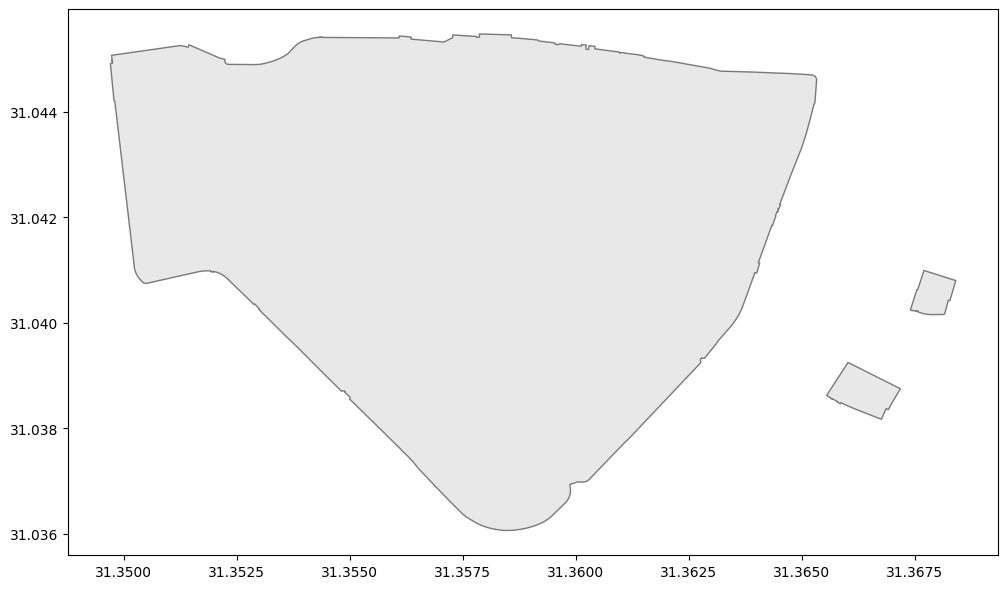

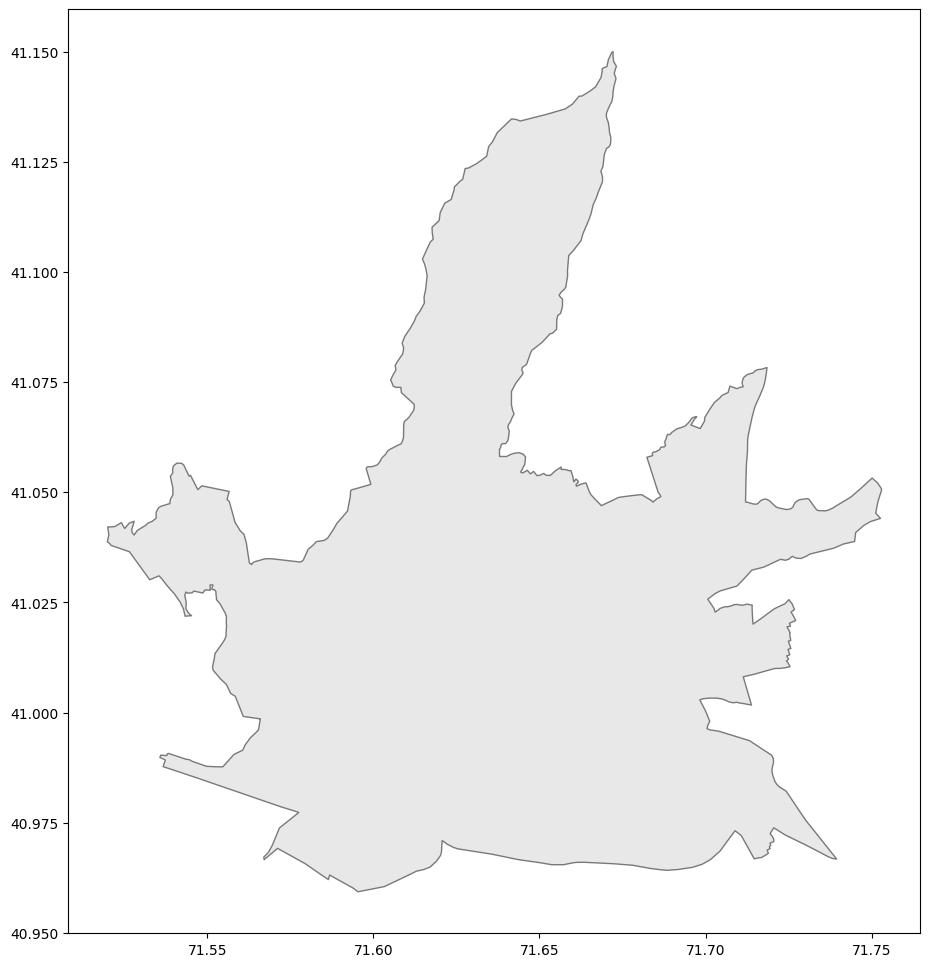

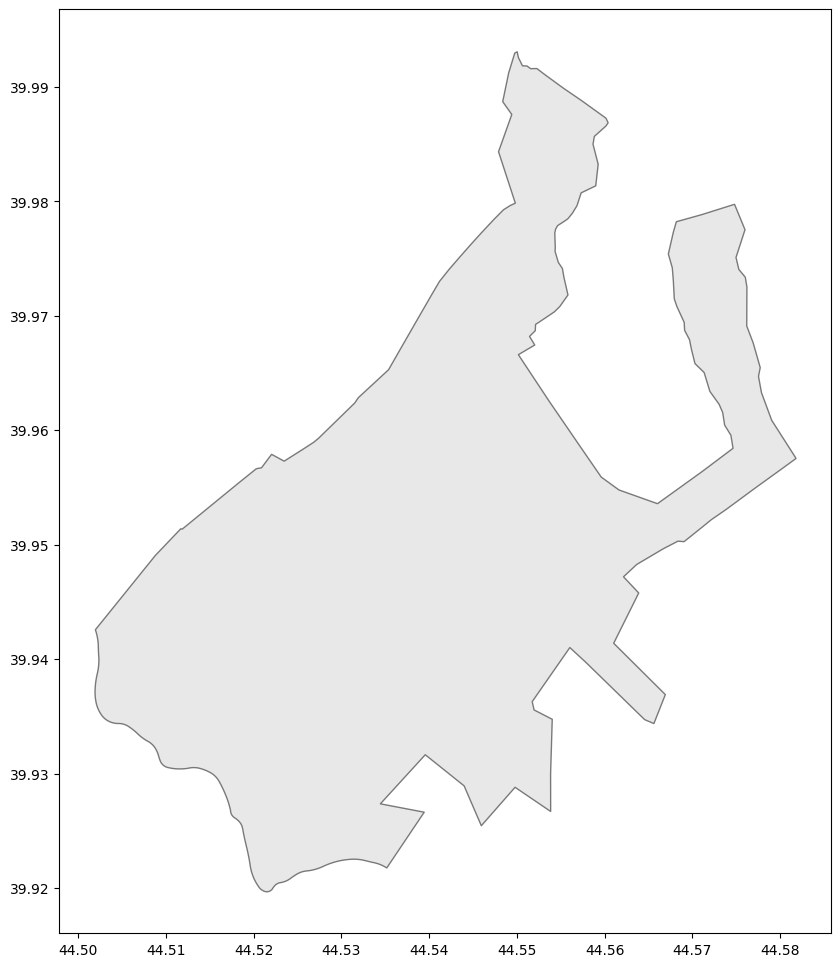

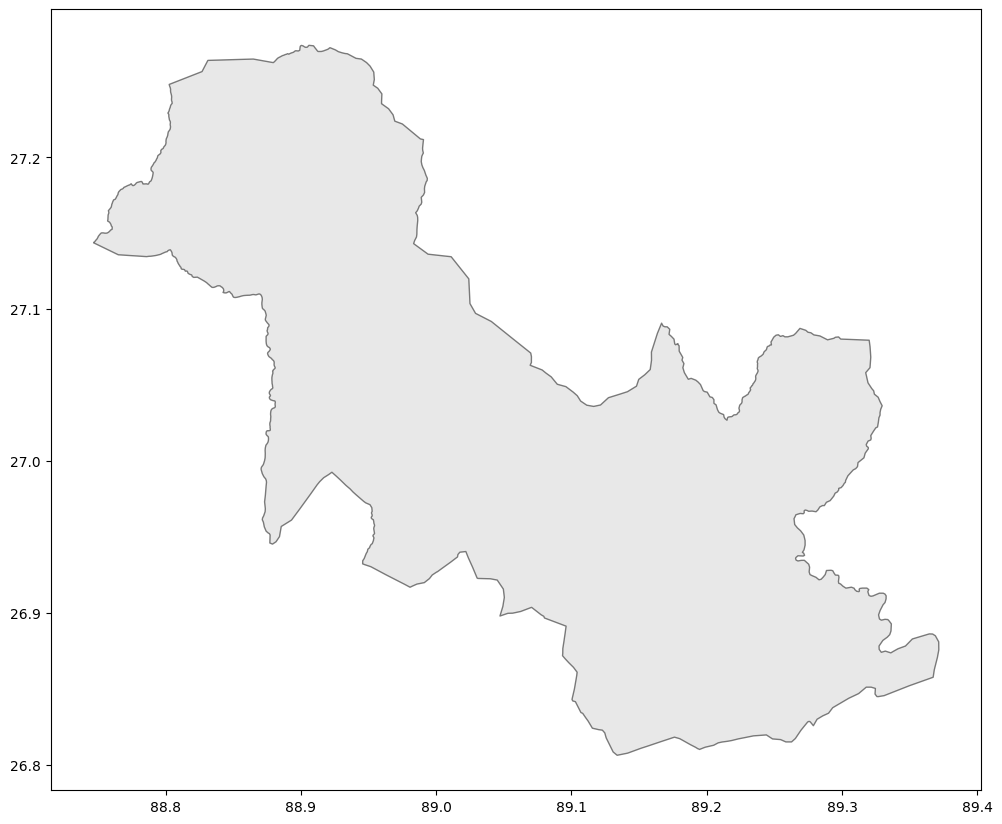

In [ ]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import contextily as ctx 

def ensure_image_folder():
    if not os.path.exists('city_images'):
        os.makedirs('city_images')

def plot_and_save_infrastructure(city_name, city_boundary, roads_gdf, highways, bus_stops, metro_lanes, airports, image_path):
    try:
        fig, ax = plt.subplots(figsize=(12, 12))

        city_boundary.plot(ax=ax, facecolor="lightgray", edgecolor="black", linewidth=1, alpha=0.5, label="Land")

        ctx.add_basemap(ax, crs=city_boundary.crs, source=ctx.providers.OpenStreetMap.Mapnik)

        city_boundary.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2, label="City Boundary")

        if not roads_gdf.empty:
            roads_gdf.plot(ax=ax, color="gray", linewidth=0.5, alpha=0.7, label="Roads")

        if not highways.empty:
            highways.plot(ax=ax, color="blue", linewidth=1, label="Highways")

        if not bus_stops.empty:
            bus_stops.plot(ax=ax, color="red", markersize=5, label="Bus Stops")

        if not metro_lanes.empty:
            metro_lanes.plot(ax=ax, color="purple", linewidth=1, linestyle="--", label="Metro Lines")

        if not airports.empty:
            airports.plot(ax=ax, color="orange", markersize=100, marker="o", alpha=0.8, label="Airports")

        import matplotlib.patches as mpatches
        import matplotlib.lines as mlines

        legend_handles = [
            mpatches.Patch(facecolor='lightgray', edgecolor='black', label="Land"),
            mlines.Line2D([], [], color='black', linewidth=2, label="City Boundary"),
            mlines.Line2D([], [], color='gray', linewidth=0.5, label="Roads"),
            mlines.Line2D([], [], color='blue', linewidth=1, label="Highways"),
            mlines.Line2D([], [], color='purple', linewidth=1, linestyle="--", label="Metro Lines"),
            plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=6, label="Bus Stops"),
            plt.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label="Airports")
        ]

        plt.legend(handles=legend_handles)
        plt.title(f"Urban Transport and Infrastructure - {city_name}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")

        plt.savefig(image_path, dpi=300)
        plt.close()

    except Exception as e:
        print(f"Error visualizing infrastructure for {city_name}: {e}")

def get_city_data_and_update_csv(city_country):
    try:
        print(f"Processing {city_country}...")
        city_boundary = ox.geocode_to_gdf(city_country)
        if city_boundary is None or city_boundary.empty:
            print(f"Error: Could not find boundary for {city_country}")
            return None

        try:
            roads = ox.graph_from_polygon(city_boundary.geometry.iloc[0], network_type="drive")
            roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
        except Exception as e:
            print(f"Error extracting roads for {city_country}: {e}")
            roads_gdf = gpd.GeoDataFrame()

        try:
            highways = ox.features_from_polygon(city_boundary.geometry.iloc[0], 
                                                tags={"highway": ["motorway", "trunk", "primary"]})
            num_unique_highways = len(highways['ref'].dropna().str.split(';', expand=True).stack().unique()) if "ref" in highways.columns else 0
        except Exception as e:
            print(f"Error extracting highways for {city_country}: {e}")
            num_unique_highways = 0
            highways = gpd.GeoDataFrame()

        try:
            bus_stops = ox.features_from_polygon(city_boundary.geometry.iloc[0], tags={"highway": "bus_stop"})
            num_bus_stops = len(bus_stops) if bus_stops is not None and not bus_stops.empty else 0
        except Exception as e:
            print(f"Error extracting bus stops for {city_country}: {e}")
            num_bus_stops = 0
            bus_stops = gpd.GeoDataFrame()

        try:
            metro_lanes = ox.features_from_polygon(city_boundary.geometry.iloc[0], 
                                                   tags={"railway": ["subway", "light_rail", "tram"]})
            num_metro_lanes = metro_lanes['name'].nunique() if metro_lanes is not None and "name" in metro_lanes.columns else 0
        except Exception as e:
            print(f"Error extracting metro lanes for {city_country}: {e}")
            num_metro_lanes = 0
            metro_lanes = gpd.GeoDataFrame()

        try:
            airports = ox.features_from_polygon(city_boundary.geometry.iloc[0], tags={"aeroway": "aerodrome"})
            num_airports = len(airports) if airports is not None and not airports.empty else 0
        except Exception as e:
            print(f"Error extracting airports for {city_country}: {e}")
            num_airports = 0
            airports = gpd.GeoDataFrame()

        image_path = f"city_images/{city_country.replace(' ', '_')}_infrastructure.png"
        plot_and_save_infrastructure(city_country, city_boundary, roads_gdf, highways, bus_stops, metro_lanes, airports, image_path)

        return {
            "City, Country": city_country,  
            "Highways": num_unique_highways,
            "Airports": num_airports,
            "Metro Lines": num_metro_lanes,
            "Bus Stops": num_bus_stops
        }
    except Exception as e:
        print(f"Error processing {city_country}: {e}")
        return None

try:
    df = pd.read_csv("/Users/ssaishiva/Downloads/Capital_Scrapper/city_data.csv")
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

df['City, Country'] = df['City, Country'].str.strip()

ensure_image_folder()

updated_data = [get_city_data_and_update_csv(city) for city in df['City, Country']]
updated_data = [data for data in updated_data if data]
updated_df = pd.DataFrame(updated_data)

if not updated_df.empty:
    df = pd.merge(df, updated_df, on="City, Country", how="left")
    df.fillna(0, inplace=True)
    try:
        df.to_csv("updated_city_data.csv", index=False)
        print("Updated CSV saved as 'updated_city_data.csv'.")
    except Exception as e:
        print(f"Error saving updated CSV: {e}")
else:
    print("No updates were made to the CSV file.")


In [2]:
pd.read_csv("updated_city_data.csv")

,"City, Country",Road Length,City Area,Road Density,Highways,Airports,Metro Lines,Bus Stops
0,"Amaravati, India",575.01,211.50,2.72,1,1,0,2
1,"Dispur, India",742.29,104.63,7.09,2,0,0,45
2,"Patna, India",4381.46,3198.05,1.37,14,2,0,9
3,"Raipur, India",3211.67,2898.39,1.11,5,2,0,13
4,"Gandhinagar, India",477.48,61.37,7.78,3,0,0,2
...,...,...,...,...,...,...,...,...
528,"Baruun-Urt, Mangolia",142.49,38.15,3.73,3,2,0,0
529,"Zuunmod, Mangolia",131.26,19.33,6.79,0,0,0,1
530,"Ulaangom, Mangolia",260.82,2700.82,0.10,3,1,0,8
531,"Uliastai, Mangolia",104.01,37.60,2.77,2,1,0,1


In [5]:
import pandas as pd
df=pd.read_csv("updated_city_data.csv")


In [6]:
df['City, Country'].value_counts()

City, Country
Cairo, Egypt             4
Tehran, Iran             4
Chandigarh, India        4
Amman, Jordan            4
Amaravati, India         1
                        ..
Yamagata, Japan          1
Wakayama, Japan          1
Utsunomiya, Japan        1
Tsu, Japan               1
Ulaanbaatar, Mangolia    1
Name: count, Length: 521, dtype: int64

In [ ]:
import pandas as pd

df = pd.read_csv("updated_city_data.csv")

print(df)

df_unique = df.drop_duplicates(subset=['City, Country'], keep='first')

print(df_unique)


             City, Country  Road Length  City Area  Road Density  Highways  \
0         Amaravati, India       575.01     211.50          2.72         1   
1            Dispur, India       742.29     104.63          7.09         2   
2             Patna, India      4381.46    3198.05          1.37        14   
3            Raipur, India      3211.67    2898.39          1.11         5   
4       Gandhinagar, India       477.48      61.37          7.78         3   
..                     ...          ...        ...           ...       ...   
528   Baruun-Urt, Mangolia       142.49      38.15          3.73         3   
529      Zuunmod, Mangolia       131.26      19.33          6.79         0   
530     Ulaangom, Mangolia       260.82    2700.82          0.10         3   
531     Uliastai, Mangolia       104.01      37.60          2.77         2   
532  Ulaanbaatar, Mangolia      8327.36    4735.55          1.76         9   

     Airports  Metro Lines  Bus Stops  
0           1          

In [11]:
df_unique['City, Country'].value_counts()

City, Country
Amaravati, India              1
Xam Neua District, Laos       1
Pakxan District, Laos         1
Houayxay District, Laos       1
Samakkhixay District, Laos    1
                             ..
Yamagata, Japan               1
Wakayama, Japan               1
Utsunomiya, Japan             1
Tsu, Japan                    1
Ulaanbaatar, Mangolia         1
Name: count, Length: 521, dtype: int64

In [13]:
df_unique.to_csv("Road_Transportationn_Data.csv")

In [14]:
pd.read_csv("Road_Transportationn_Data.csv")

,Unnamed: 0,"City, Country",Road Length,City Area,Road Density,Highways,Airports,Metro Lines,Bus Stops
0,0,"Amaravati, India",575.01,211.50,2.72,1,1,0,2
1,1,"Dispur, India",742.29,104.63,7.09,2,0,0,45
2,2,"Patna, India",4381.46,3198.05,1.37,14,2,0,9
3,3,"Raipur, India",3211.67,2898.39,1.11,5,2,0,13
4,4,"Gandhinagar, India",477.48,61.37,7.78,3,0,0,2
...,...,...,...,...,...,...,...,...,...
516,528,"Baruun-Urt, Mangolia",142.49,38.15,3.73,3,2,0,0
517,529,"Zuunmod, Mangolia",131.26,19.33,6.79,0,0,0,1
518,530,"Ulaangom, Mangolia",260.82,2700.82,0.10,3,1,0,8
519,531,"Uliastai, Mangolia",104.01,37.60,2.77,2,1,0,1
